In [1]:
# Explore overfitting and underfitting

In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.11.0


In [3]:
# Download the IMDB dataset

In [4]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

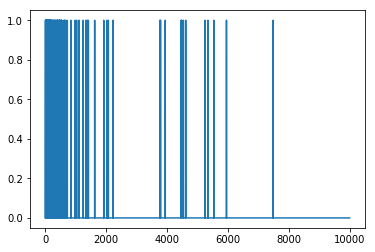

In [5]:
plt.plot(train_data[0])

In [6]:
# Demonstrate overfitting

In [7]:
# Create a baseline model

In [8]:
baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works. 
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [9]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 17s - loss: 0.4846 - acc: 0.8005 - binary_crossentropy: 0.4846 - val_loss: 0.3345 - val_acc: 0.8746 - val_binary_crossentropy: 0.3345
Epoch 2/20
 - 4s - loss: 0.2490 - acc: 0.9111 - binary_crossentropy: 0.2490 - val_loss: 0.2840 - val_acc: 0.8871 - val_binary_crossentropy: 0.2840
Epoch 3/20
 - 4s - loss: 0.1817 - acc: 0.9369 - binary_crossentropy: 0.1817 - val_loss: 0.2886 - val_acc: 0.8854 - val_binary_crossentropy: 0.2886
Epoch 4/20
 - 4s - loss: 0.1437 - acc: 0.9508 - binary_crossentropy: 0.1437 - val_loss: 0.3140 - val_acc: 0.8796 - val_binary_crossentropy: 0.3140
Epoch 5/20
 - 4s - loss: 0.1176 - acc: 0.9617 - binary_crossentropy: 0.1176 - val_loss: 0.3397 - val_acc: 0.8737 - val_binary_crossentropy: 0.3397
Epoch 6/20
 - 5s - loss: 0.0956 - acc: 0.9708 - binary_crossentropy: 0.0956 - val_loss: 0.3703 - val_acc: 0.8696 - val_binary_crossentropy: 0.3703
Epoch 7/20
 - 4s - loss: 0.0779 - acc: 0.9777 - binary_crossentropy

In [10]:
# Create a smaller model

In [11]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [12]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 6s - loss: 0.6009 - acc: 0.6730 - binary_crossentropy: 0.6009 - val_loss: 0.5233 - val_acc: 0.7951 - val_binary_crossentropy: 0.5233
Epoch 2/20
 - 5s - loss: 0.4731 - acc: 0.8525 - binary_crossentropy: 0.4731 - val_loss: 0.4843 - val_acc: 0.8424 - val_binary_crossentropy: 0.4843
Epoch 3/20
 - 4s - loss: 0.4265 - acc: 0.9012 - binary_crossentropy: 0.4265 - val_loss: 0.4647 - val_acc: 0.8702 - val_binary_crossentropy: 0.4647
Epoch 4/20
 - 4s - loss: 0.3939 - acc: 0.9267 - binary_crossentropy: 0.3939 - val_loss: 0.4552 - val_acc: 0.8749 - val_binary_crossentropy: 0.4552
Epoch 5/20
 - 5s - loss: 0.3685 - acc: 0.9401 - binary_crossentropy: 0.3685 - val_loss: 0.4492 - val_acc: 0.8767 - val_binary_crossentropy: 0.4492
Epoch 6/20
 - 5s - loss: 0.3465 - acc: 0.9520 - binary_crossentropy: 0.3465 - val_loss: 0.4515 - val_acc: 0.8725 - val_binary_crossentropy: 0.4515
Epoch 7/20
 - 4s - loss: 0.3268 - acc: 0.9596 - binary_crossentropy:

In [13]:
# Create a bigger model

In [25]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               5120512   
_________________________________________________________________
dense_16 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [26]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 16s - loss: 0.3446 - acc: 0.8532 - binary_crossentropy: 0.3446 - val_loss: 0.2920 - val_acc: 0.8794 - val_binary_crossentropy: 0.2920
Epoch 2/20
 - 14s - loss: 0.1378 - acc: 0.9504 - binary_crossentropy: 0.1378 - val_loss: 0.3434 - val_acc: 0.8702 - val_binary_crossentropy: 0.3434
Epoch 3/20
 - 12s - loss: 0.0435 - acc: 0.9876 - binary_crossentropy: 0.0435 - val_loss: 0.4506 - val_acc: 0.8698 - val_binary_crossentropy: 0.4506
Epoch 4/20
 - 12s - loss: 0.0057 - acc: 0.9993 - binary_crossentropy: 0.0057 - val_loss: 0.5851 - val_acc: 0.8697 - val_binary_crossentropy: 0.5851
Epoch 5/20
 - 12s - loss: 0.0013 - acc: 1.0000 - binary_crossentropy: 0.0013 - val_loss: 0.6636 - val_acc: 0.8699 - val_binary_crossentropy: 0.6636
Epoch 6/20
 - 12s - loss: 2.3814e-04 - acc: 1.0000 - binary_crossentropy: 2.3814e-04 - val_loss: 0.7075 - val_acc: 0.8705 - val_binary_crossentropy: 0.7075
Epoch 7/20
 - 14s - loss: 1.4483e-04 - acc: 1.0000 - b

In [27]:
# Plot the training and validation loss

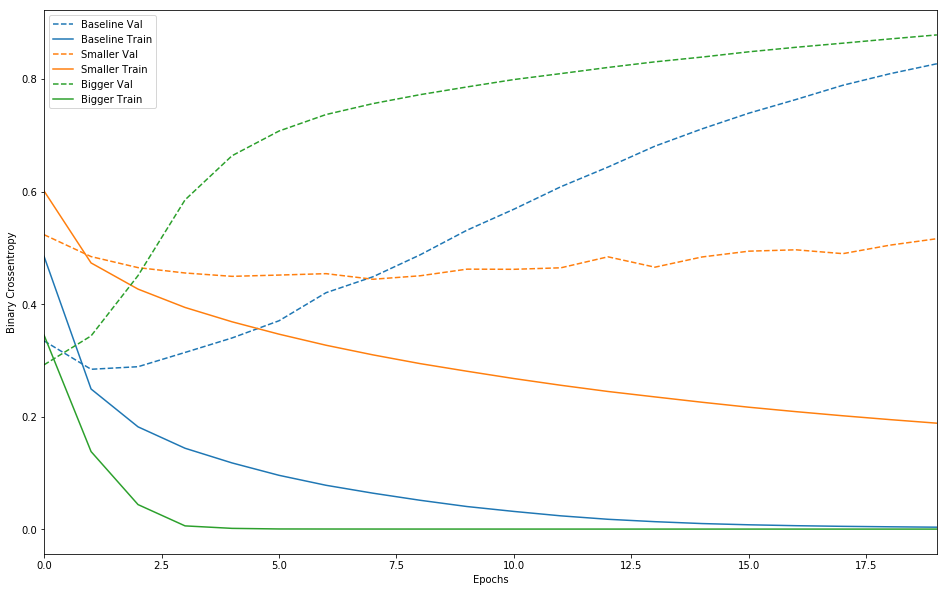

In [28]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [29]:
# Strategies

In [30]:
# Add weight regularization

In [31]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 8s - loss: 0.5754 - acc: 0.7687 - binary_crossentropy: 0.5391 - val_loss: 0.4179 - val_acc: 0.8651 - val_binary_crossentropy: 0.3801
Epoch 2/20
 - 4s - loss: 0.3315 - acc: 0.8997 - binary_crossentropy: 0.2879 - val_loss: 0.3411 - val_acc: 0.8868 - val_binary_crossentropy: 0.2933
Epoch 3/20
 - 4s - loss: 0.2688 - acc: 0.9236 - binary_crossentropy: 0.2179 - val_loss: 0.3348 - val_acc: 0.8866 - val_binary_crossentropy: 0.2820
Epoch 4/20
 - 4s - loss: 0.2425 - acc: 0.9344 - binary_crossentropy: 0.1880 - val_loss: 0.3500 - val_acc: 0.8820 - val_binary_crossentropy: 0.2942
Epoch 5/20
 - 4s - loss: 0.2264 - acc: 0.9419 - binary_crossentropy: 0.1694 - val_loss: 0.3568 - val_acc: 0.8804 - val_binary_crossentropy: 0.2990
Epoch 6/20
 - 4s - loss: 0.2148 - acc: 0.9468 - binary_crossentropy: 0.1561 - val_loss: 0.3638 - val_acc: 0.8784 - val_binary_crossentropy: 0.3048
Epoch 7/20
 - 4s - loss: 0.2044 - acc: 0.9524 - binary_crossentropy:

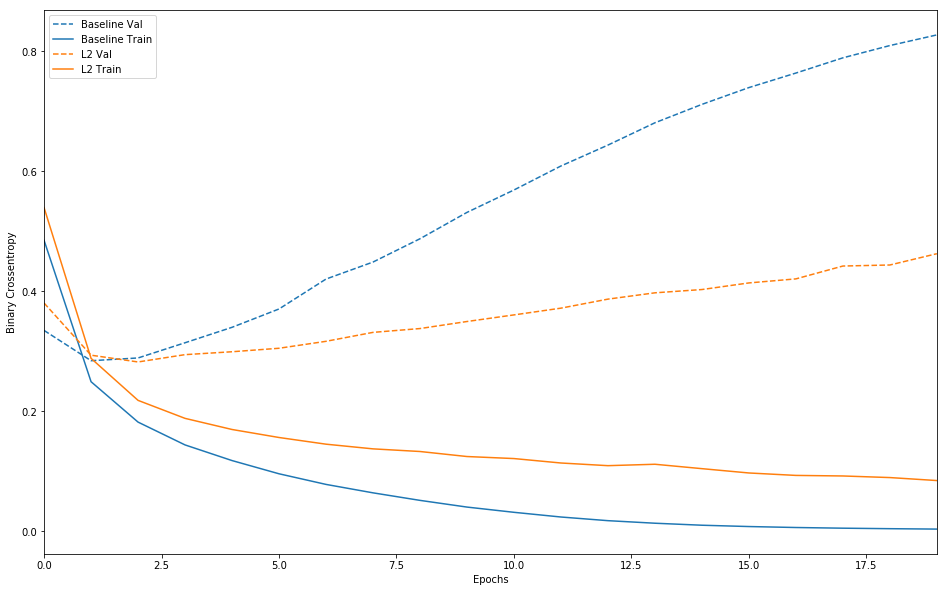

In [32]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [33]:
# Add dropout

In [34]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.6446 - acc: 0.6249 - binary_crossentropy: 0.6446 - val_loss: 0.5460 - val_acc: 0.8493 - val_binary_crossentropy: 0.5460
Epoch 2/20
 - 4s - loss: 0.4989 - acc: 0.7801 - binary_crossentropy: 0.4989 - val_loss: 0.3676 - val_acc: 0.8776 - val_binary_crossentropy: 0.3676
Epoch 3/20
 - 4s - loss: 0.3765 - acc: 0.8536 - binary_crossentropy: 0.3765 - val_loss: 0.2954 - val_acc: 0.8874 - val_binary_crossentropy: 0.2954
Epoch 4/20
 - 4s - loss: 0.3025 - acc: 0.8915 - binary_crossentropy: 0.3025 - val_loss: 0.2765 - val_acc: 0.8878 - val_binary_crossentropy: 0.2765
Epoch 5/20
 - 4s - loss: 0.2600 - acc: 0.9047 - binary_crossentropy: 0.2600 - val_loss: 0.2776 - val_acc: 0.8866 - val_binary_crossentropy: 0.2776
Epoch 6/20
 - 4s - loss: 0.2243 - acc: 0.9191 - binary_crossentropy: 0.2243 - val_loss: 0.2872 - val_acc: 0.8838 - val_binary_crossentropy: 0.2872
Epoch 7/20
 - 4s - loss: 0.1983 - acc: 0.9292 - binary_crossentropy:

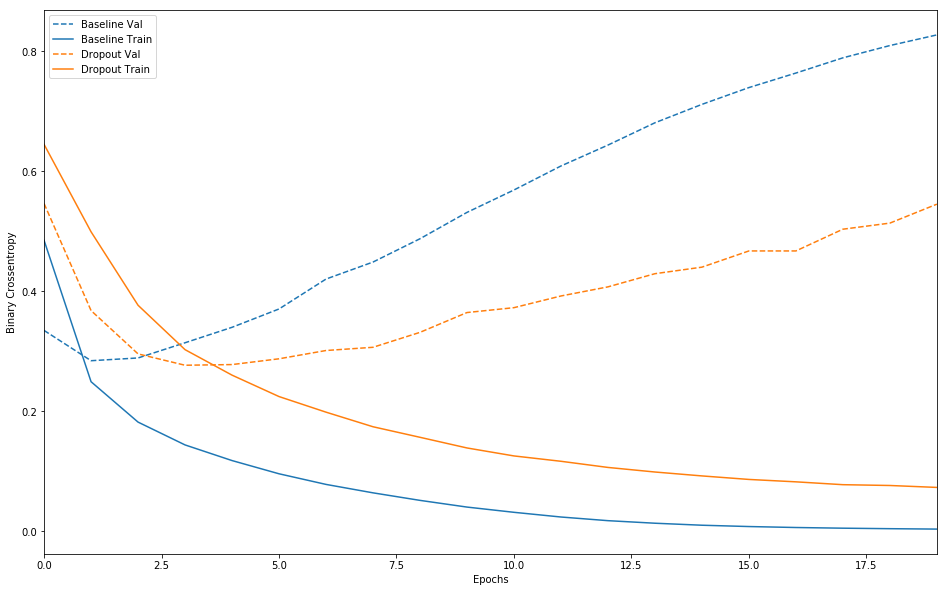

In [35]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])